<h2>Dataset Link</h2>

https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/data

<h2>Data Preprocessing</h2>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
import tensorflow as tf
import random
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
import joblib

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Dataset/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
df = df[~(df['RestingBP']==0)] # remove RestingBP = 0 due to unreasonable

In [6]:
df.shape

(917, 12)

In [7]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,199.016358,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,109.246330,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,174.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
df.duplicated().sum()

0

<h2>EDA</h2>

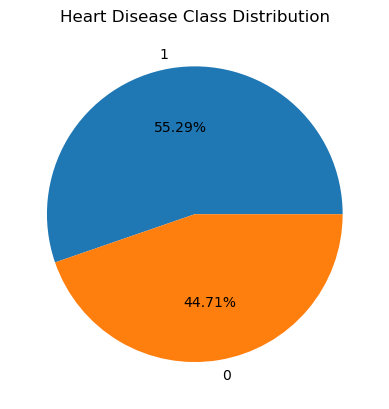

In [9]:
plt.pie(df['HeartDisease'].value_counts(), labels=df['HeartDisease'].value_counts().index, autopct='%1.2f%%')
plt.title('Heart Disease Class Distribution')
plt.show();

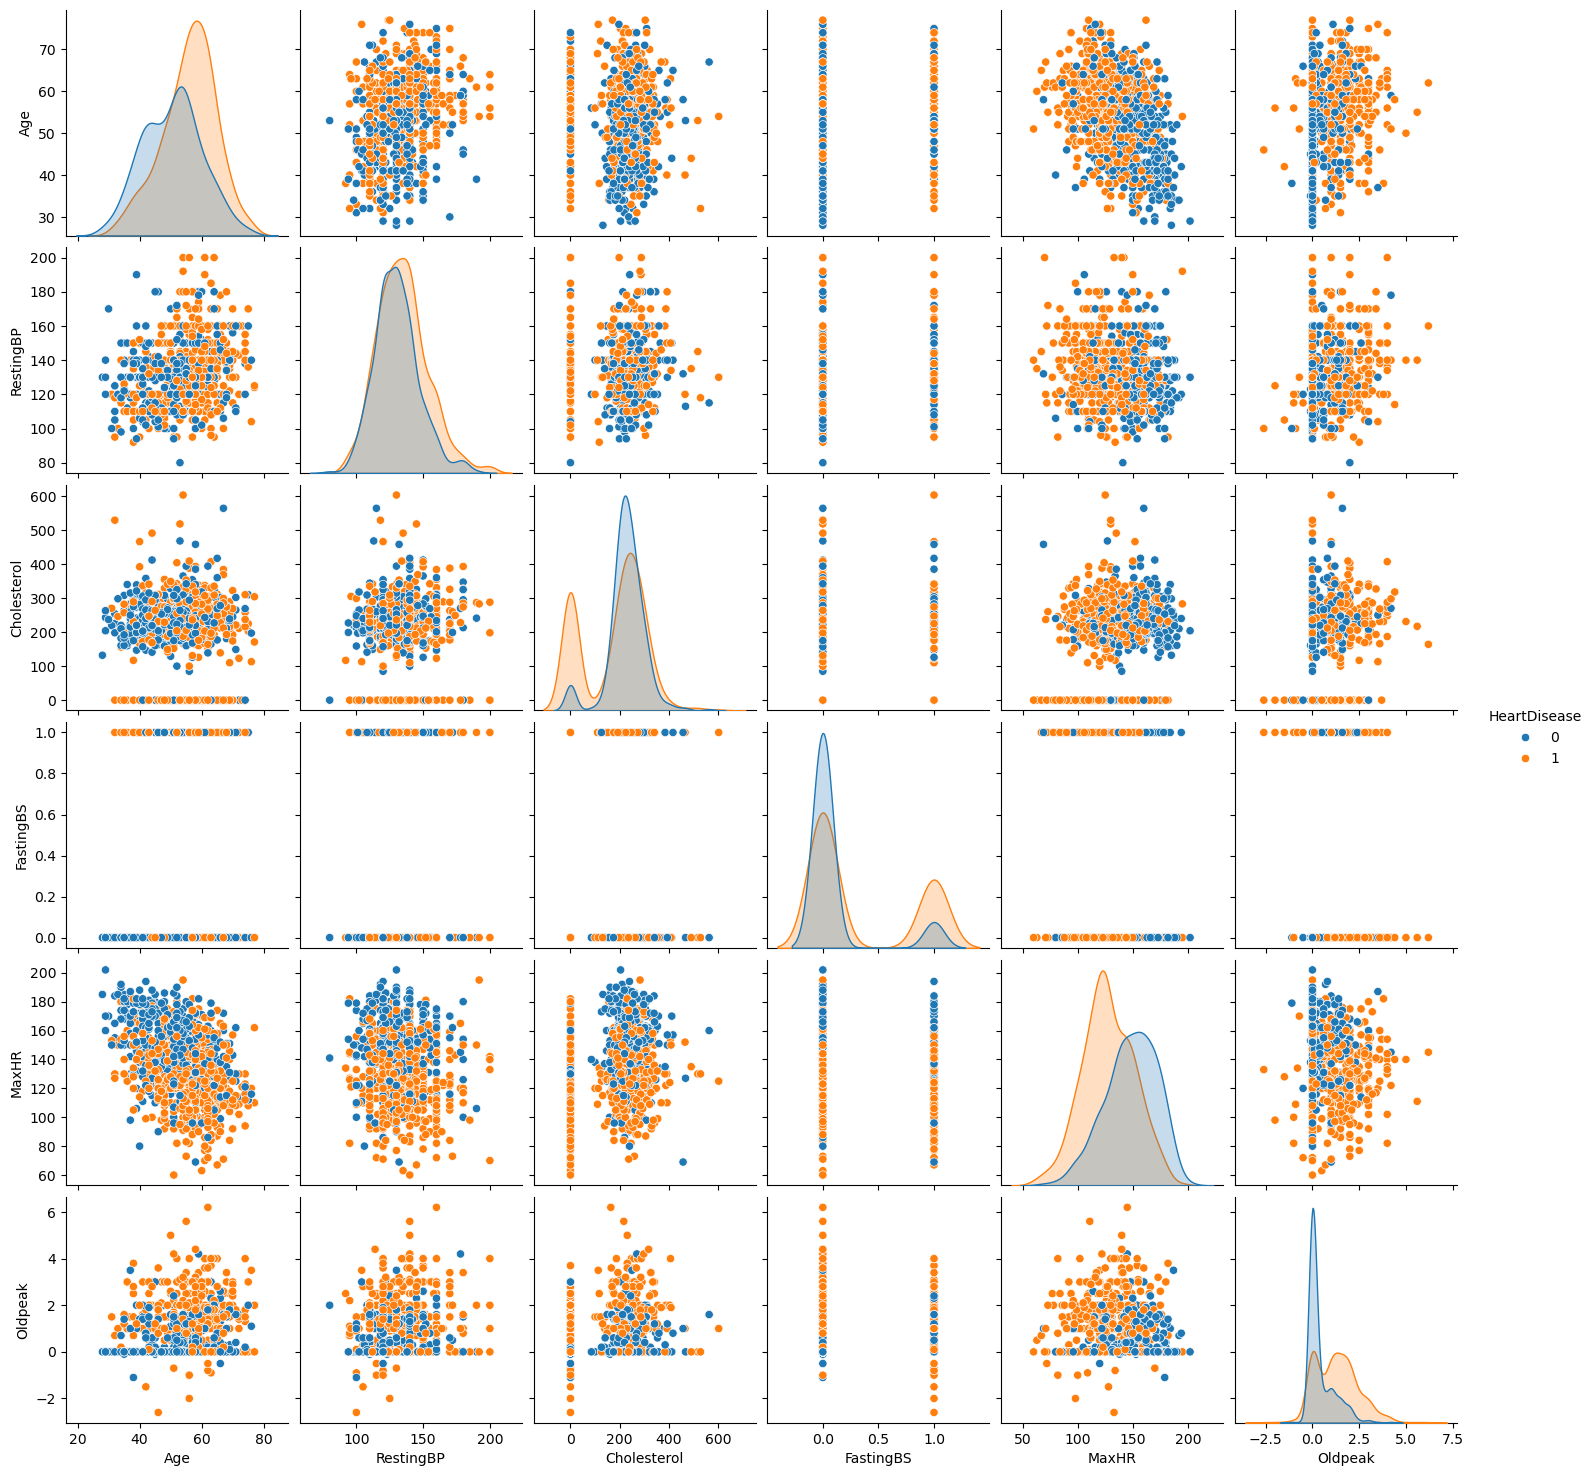

In [10]:
sns.pairplot(df, hue='HeartDisease')

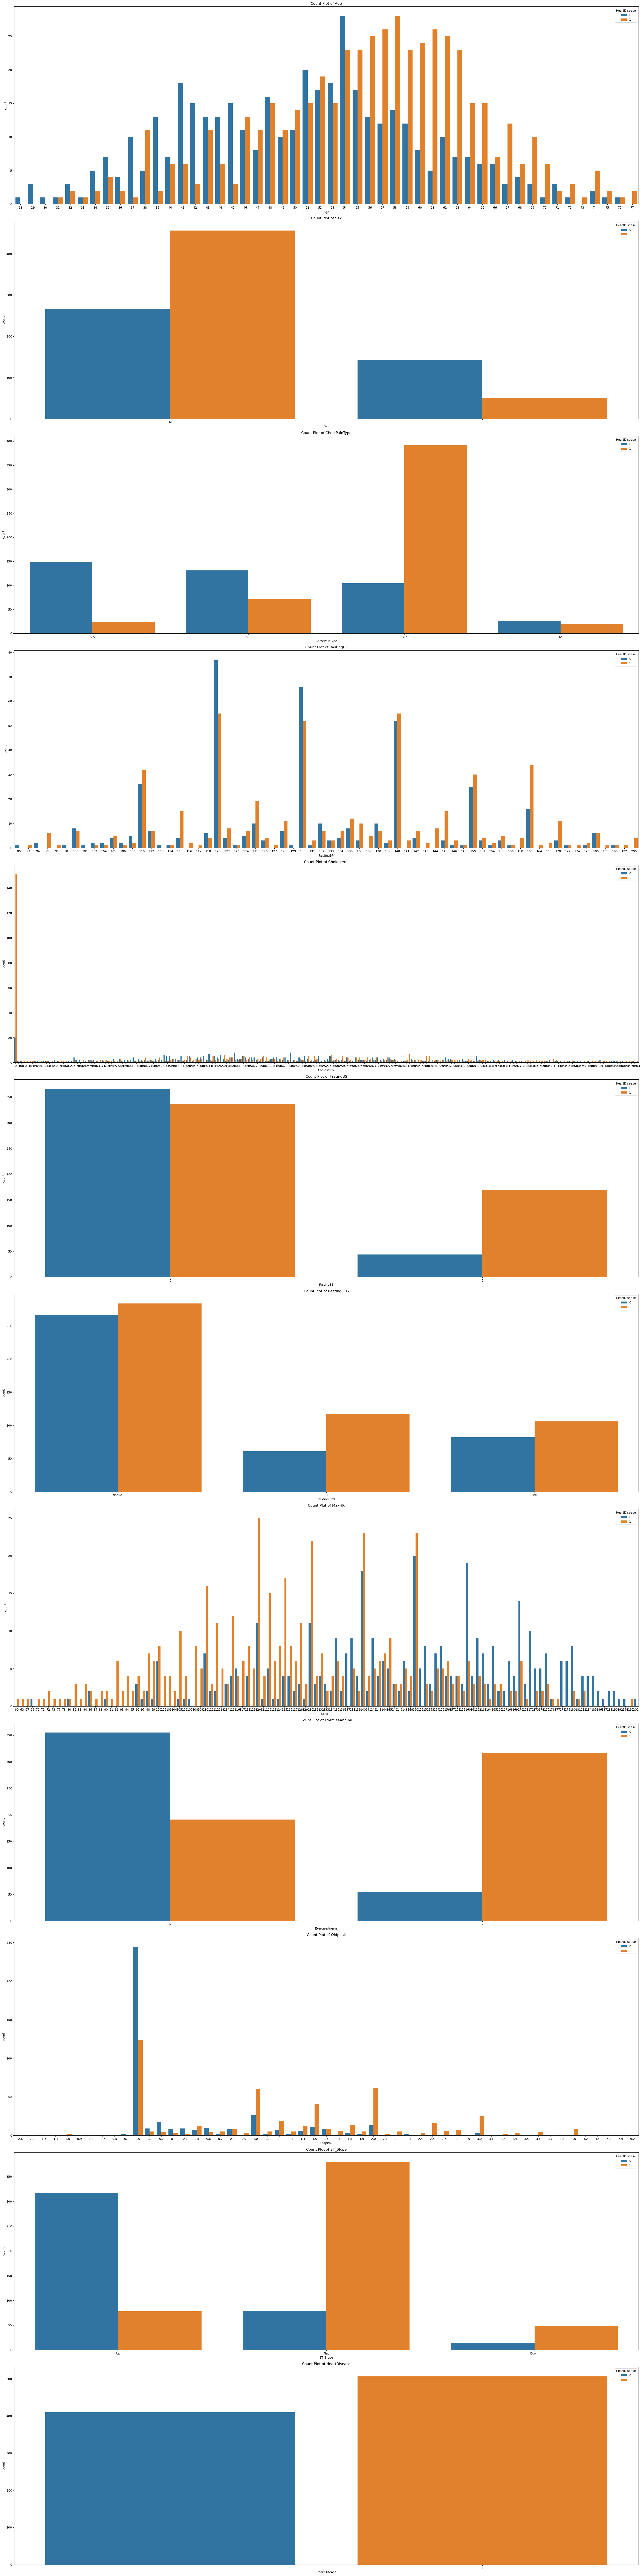

In [11]:
# Create subplots
fig, axes = plt.subplots(nrows=len(df.columns), figsize=(30, 10 * len(df.columns)))

# Loop through columns and plot countplots
for i, col in enumerate(df.columns):
    sns.countplot(x=df[col], hue=df['HeartDisease'], ax=axes[i])
    axes[i].set_title(f"Count Plot of {col}")

plt.tight_layout()
plt.show();

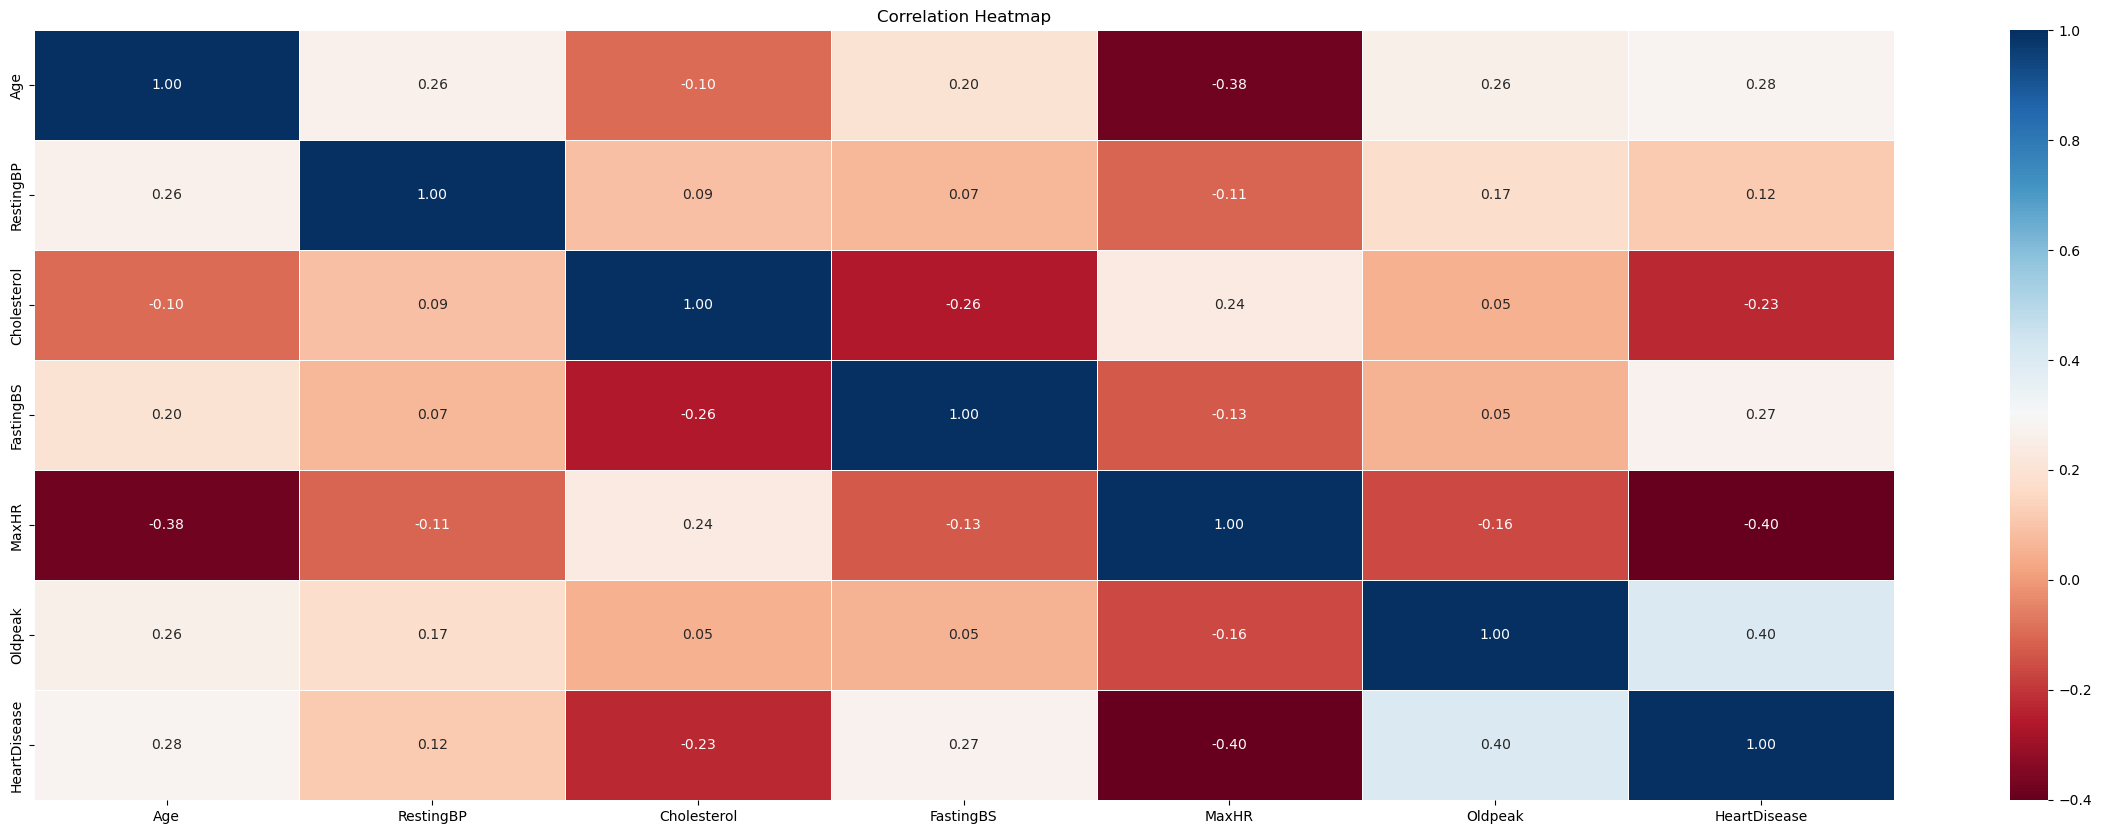

In [12]:
plt.figure(figsize=(30, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='RdBu', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show();

<h2>Data Splitting</h2>

In [13]:
x = df.drop(['HeartDisease'], axis=1)
y = df['HeartDisease']

In [14]:
x_dummies = pd.get_dummies(x, drop_first=True)
x_dummies.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,True,False,True,False,True,False,False,False,True


In [15]:
x_dummies.shape

(917, 15)

In [16]:
columns = x_dummies.columns.tolist()
joblib.dump(columns, 'columns.pkl') # Save

['columns.pkl']

In [17]:
columns

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'Sex_M',
 'ChestPainType_ATA',
 'ChestPainType_NAP',
 'ChestPainType_TA',
 'RestingECG_Normal',
 'RestingECG_ST',
 'ExerciseAngina_Y',
 'ST_Slope_Flat',
 'ST_Slope_Up']

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x_dummies, y, test_size=0.2, random_state=42)

sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

<h2>Machine Learning</h2>

In [19]:
gb = GradientBoostingClassifier(n_estimators=50, random_state=42)
gb.fit(x_train, y_train)
print('Training score:',gb.score(x_train, y_train))
print('Testing score:',gb.score(x_test,y_test))

Training score: 0.922237380627558
Testing score: 0.8967391304347826


In [20]:
y_pred = gb.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        72
           1       0.90      0.93      0.92       112

    accuracy                           0.90       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.90      0.90      0.90       184



In [21]:
importances = gb.feature_importances_
feature_names = x_dummies.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

importance_df

,Feature,Importance
14,ST_Slope_Up,0.517136
5,Oldpeak,0.085125
12,ExerciseAngina_Y,0.073516
2,Cholesterol,0.066357
4,MaxHR,0.055330
6,Sex_M,0.050954
1,RestingBP,0.031678
8,ChestPainType_NAP,0.028242
3,FastingBS,0.024940
7,ChestPainType_ATA,0.024898


In [22]:
# Save the ML model
joblib.dump(gb, 'ML_model.pkl')
print("ML model saved successfully!")

ML model saved successfully!


<h2>Deep Learning</h2>

In [23]:
DL_model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='tanh', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(32, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model
DL_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = DL_model.fit(x_train, y_train, epochs=50, batch_size=16, validation_data=(x_test, y_test), callbacks=[EarlyStopping(patience=5)])

Epoch 1/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - accuracy: 0.5451 - loss: 0.8515 - val_accuracy: 0.8533 - val_loss: 0.3994
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8766 - loss: 0.3710 - val_accuracy: 0.8533 - val_loss: 0.3881
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.8429 - loss: 0.3983 - val_accuracy: 0.8261 - val_loss: 0.4228
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.8506 - loss: 0.3643 - val_accuracy: 0.8859 - val_loss: 0.3475
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.8588 - loss: 0.3242 - val_accuracy: 0.8804 - val_loss: 0.3254
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.8703 - loss: 0.3139 - val_accuracy: 0.8859 - val_loss: 0.3343
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.8783 - loss: 0.3052 - val_accuracy: 0.8804 - val_loss: 0.3558
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8817 - loss: 0.2957 - val_accuracy: 0.8804 - 

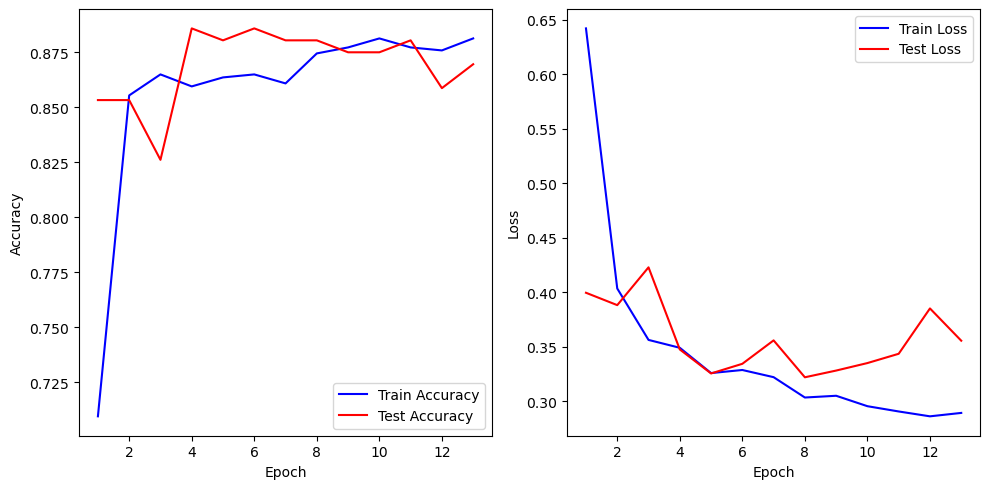

In [24]:
# learning curve
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
# creating subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(epochs, acc, 'b', label='Train Accuracy')
axes[0].plot(epochs, val_acc, 'r', label='Test Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

axes[1].plot(epochs, loss, 'b', label='Train Loss')
axes[1].plot(epochs, val_loss, 'r', label='Test Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

# adusting layout for better spacing
plt.tight_layout()

# display the figure
plt.show();

In [25]:
y_pred = DL_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step


In [26]:
cr_DL = classification_report(y_test, y_pred_classes)
print(cr_DL)

              precision    recall  f1-score   support

           0       0.80      0.89      0.84        72
           1       0.92      0.86      0.89       112

    accuracy                           0.87       184
   macro avg       0.86      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



In [27]:
# Save the DL model
DL_model.save('DL_model.keras')
print("DL model saved successfully!")

DL model saved successfully!


<h2>Machine Learning vs Deep Learning</h2>

In [28]:
# Load Models and dummies
ML_model = joblib.load('ML_model.pkl')
DL_model = load_model("DL_model.keras")
columns = joblib.load('columns.pkl')
new_data_dict = {
    'Age': [64],
    'RestingBP': [144],
    'Cholesterol': [218],
    'FastingBS': [0],
    'MaxHR': [122],
    'Oldpeak': [1],
    'Sex_M': [True],
    'ChestPainType_ATA': [False],
    'ChestPainType_NAP': [False],
    'ChestPainType_TA': [False],
    'RestingECG_Normal': [False],
    'RestingECG_ST': [True],
    'ExerciseAngina_Y': [True],
    'ST_Slope_Flat': [True],
    'ST_Slope_Up': [False]
}

new_df = pd.DataFrame(new_data_dict)
new_df_dummies = pd.get_dummies(new_df, drop_first=True)
new_df_dummies = new_df_dummies.reindex(columns=columns, fill_value=0)

new_df_scaled = sc.transform(new_df_dummies)

ML_prediction = ML_model.predict(new_df_scaled)

new_df_scaled = np.expand_dims(new_df_scaled, axis=-1)
y_pred = DL_model.predict(new_df_scaled)
DL_prediction = np.argmax(y_pred, axis=1)

print("ML Heart Disease Predicted:", ML_prediction)
print("DL Heart Disease Predicted:", DL_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step
ML Heart Disease Predicted: [1]
DL Heart Disease Predicted: [1]
